In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv("train.csv")

In [21]:
print(dataset.head())

         UID                ph_no    cvv  credit_card_number  \
0  T77962103           7059868985  673.0        2.131868e+14   
1  O92591533  +1-288-810-2425x013  983.0        4.820055e+15   
2  O31883571    791.502.4387x7276  855.0        4.031429e+15   
3  M18080565           2522308761  806.0        3.036423e+13   
4  Q74073854     683-521-2001x423  424.0        4.610207e+15   

                             job                      email  \
0                           Copy  guerrerodavid@example.org   
1  Interior and spatial designer     michaela47@example.org   
2       Scientist, water quality       zhoffman@example.org   
3                   Toxicologist         hprice@example.net   
4              Software engineer      michael61@example.net   

                         url                country  emoji             name  \
0         http://garcia.org/                  Gabon      📑     Cathy Cherry   
1          http://ortiz.com/                Bermuda     🥷🏿    Austin Graham   

In [22]:
print(dataset.info)

<bound method DataFrame.info of               UID                ph_no     cvv  credit_card_number  \
0       T77962103           7059868985   673.0        2.131868e+14   
1       O92591533  +1-288-810-2425x013   983.0        4.820055e+15   
2       O31883571    791.502.4387x7276   855.0        4.031429e+15   
3       M18080565           2522308761   806.0        3.036423e+13   
4       Q74073854     683-521-2001x423   424.0        4.610207e+15   
...           ...                  ...     ...                 ...   
139995  363253815    (308)956-9340x849   246.0        4.224368e+15   
139996  501612410     250.952.6242x324  5704.0        3.595100e+15   
139997  C50473932         217.970.6851   197.0        2.563124e+15   
139998  S27033224         747-866-0589   621.0        4.223086e+15   
139999  Z76517010         728-556-3128   538.0        3.021959e+13   

                                   job                        email  \
0                                 Copy    guerrerodavid@

In [23]:
print(dataset.describe)

<bound method NDFrame.describe of               UID                ph_no     cvv  credit_card_number  \
0       T77962103           7059868985   673.0        2.131868e+14   
1       O92591533  +1-288-810-2425x013   983.0        4.820055e+15   
2       O31883571    791.502.4387x7276   855.0        4.031429e+15   
3       M18080565           2522308761   806.0        3.036423e+13   
4       Q74073854     683-521-2001x423   424.0        4.610207e+15   
...           ...                  ...     ...                 ...   
139995  363253815    (308)956-9340x849   246.0        4.224368e+15   
139996  501612410     250.952.6242x324  5704.0        3.595100e+15   
139997  C50473932         217.970.6851   197.0        2.563124e+15   
139998  S27033224         747-866-0589   621.0        4.223086e+15   
139999  Z76517010         728-556-3128   538.0        3.021959e+13   

                                   job                        email  \
0                                 Copy    guerrerodavi

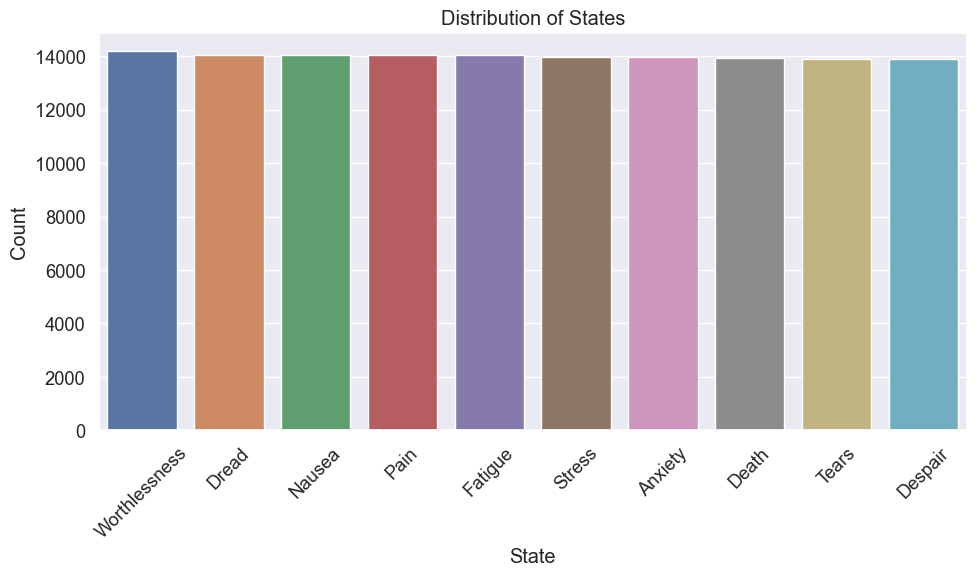

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="state", order=dataset["state"].value_counts().index)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of States')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [25]:
dataset = dataset.drop(["UID","ph_no","job","UZRdX","Bz7Ov","country","cvv","credit_card_number","email","url","emoji","name"],axis =1)

In [26]:
def clean_columns(dataset):
    for column in dataset.columns[:-1]:
        dataset[column] = dataset[column].str.extract(r'(\-?\d+\.\d+)').astype(float)

In [27]:
clean_columns(dataset)

In [29]:
def correlation(dataset, threshold):
  col_cor = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_cor.add(colname)
  return col_cor

In [30]:
corr_features = correlation(dataset.drop(['state'], axis = 1), 0.7)

In [31]:
dataset = dataset.drop(corr_features,axis = 1)

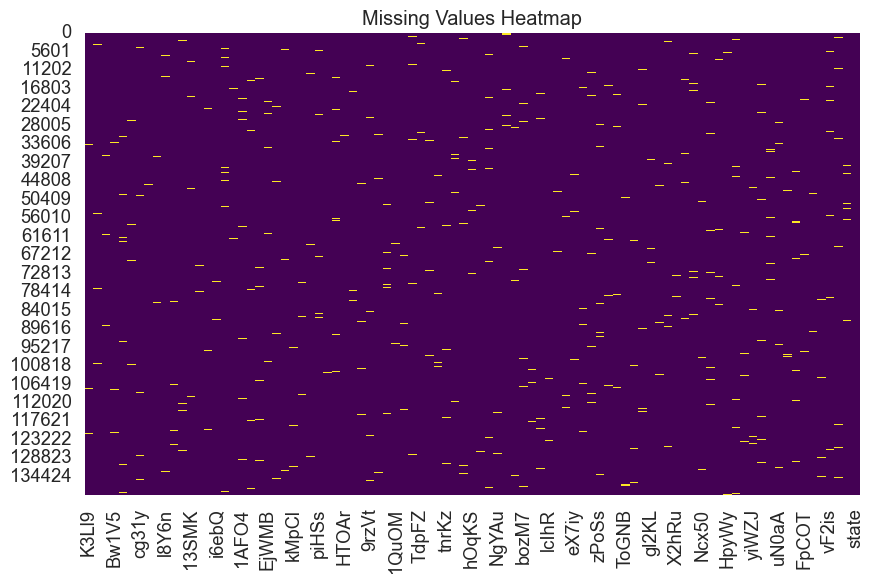

In [33]:
missing_values = dataset.isnull()
plt.figure(figsize=(10, 6))


sns.heatmap(missing_values, cmap='viridis', cbar=False)

plt.title('Missing Values Heatmap')
plt.show()